<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week9/w9_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05. 회귀**

## **01 회귀 소개**

**회귀 분석**: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
  - $Y$: (통계) 종속변수 = (머신러닝) 결정 값
  - $X_i$: (통계) 독립변수 = (머신러닝) 피처
  - $W_i$: 회귀 계수
- 머신러닝 회귀 예측: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾는 것

**회귀 유형 구분**
- 회귀 계수의 선형/비선형 여부 -> 선형 회귀, 비선형 회귀
- 독립변수 개수 -> 단일 회귀, 다중 회귀

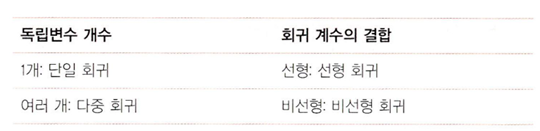

**지도학습 유형**
- **분류**: 예측값이 카테고리와 같은 이산형 클래스 값
- **회귀**: 예측값이 연속형 숫자 값

**선형 회귀**
- 가장 많이 사용되는 회귀
- 실제 값과 예측값의 차이(오차 제곱)를 최소화하는 직선형 회귀선을 최적화하는 방식
- **규제(Regularization)** 방법에 따른 분류
  - **일반 선형 회귀**: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화하도록 회귀 계수 최적화 - 규제 적용 X
  - **릿지(Ridge)**: 선형 회귀 + L2 규제
    - **L2 규제**: 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제
  - **라쏘(Lasso)**: 선형 회귀 + L1 규제
    - **L1 규제**: 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함
      
      => **피처 선택** 기능으로도 불림

## **02 단순 선형 회귀를 통한 회귀 이해**

- **단순 선형 회귀**: 독립변수 1개, 종속변수 1개인 선형 회귀

  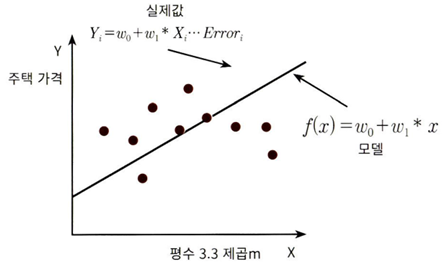

- X축: 주택 크기
- Y축: 주택 가격

  => 주택 가격을 1차 함수식으로 모델링할 수 있음
  - $\hat{Y}=w0+w1*X$
- 실제 주택 가격: 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값
  - $\hat{Y}=w0+w1*X+오차$
- **잔차**: 실제 값과 회귀 모델의 차이에 따른 오류 값
  - 최적의 회귀 모델 = 전체 데이터의 잔차 합이 최소가 되는 모델

  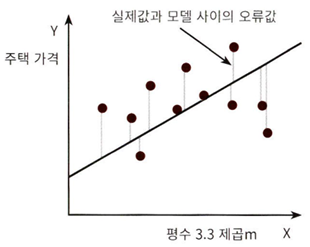

오류 값은 +나 -가 될 수 있기 때문에 전체 데이터의 오류 합을 단순히 더하면 오류 합이 줄어들 수 있음

  => 절댓값을 취해서 더하기**(Mean Absolute Error)**, 오류 값의 제곱을 더하기**(RSS, Residual Sum of Square)**
  - 주로 RSS 방식을 사용. $Error^2=RSS$

  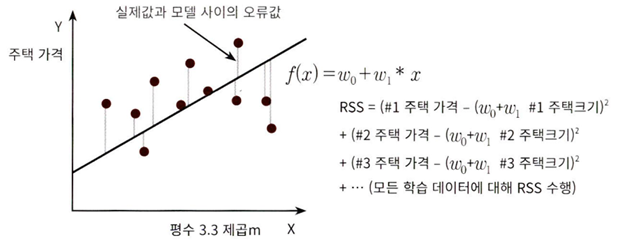


- RSS는 변수가 $w_0, w_1$인 식으로 표현 가능
- 학습을 통해 RSS를 최소로하는 회귀계수 $w_0, w_1$를 찾는 것이 머신러닝 기반 회귀의 핵심 사항
- RSS의 중심 변수: **w(회귀 계수)**
  - 독립변수 X, 종속변수 Y **(X)**

$$RSS(w_0,w_1)=\frac{1}{N}∑^N_{i=1}(y_i-(w_0+w_1*x_i))^2$$
- RSS: 회귀에서의 비용(cost)
  - w 변수(회귀 계수)로 구성되는 **RSS = 비용 함수 = 손실 함수(loss function)**

## **03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**
비용 함수가 최소가 되는 W 파라미터 구하기
- **경사 하강법**: '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식
  - 고차원 방정식을 푸는 것보다 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있음
  - 반복적으로 비용 함수의 반환 값, 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 보정

  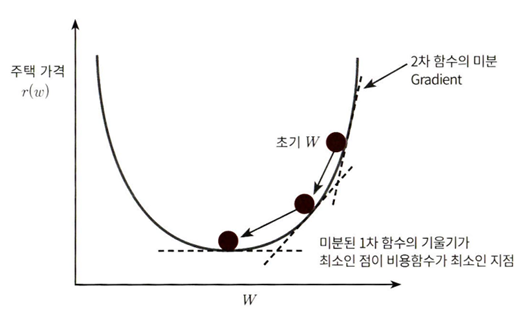
  
**비용 함수가 포물선 형태의 2차 함수일 때**
- 최초 w에서부터 미분을 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 w 업데이트
- 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그 때의 w 반환

**경사 하강법의 프로세스**
1. $w_1, w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값 계산
2. 원래 $w_1, w_0$ 값을 새로운 값으로 업데이트한 후 비용 함수 값 다시 계산
  - $w_1$ <- $w_1+η\frac{2}{N}∑^N_{i=1}x_i*(실제값_i-예측값_i)$
  - $w_0$ <- $w_1+η\frac{2}{N}∑^N_{i=1}(실제값_i-예측값_i)$
3. 비용 함수 값이 감소했으면 Step 2 반복. 비용 함수 값이 감소하지 않으면 그때의 $w_1, w_0$를 구하고 반복 중지

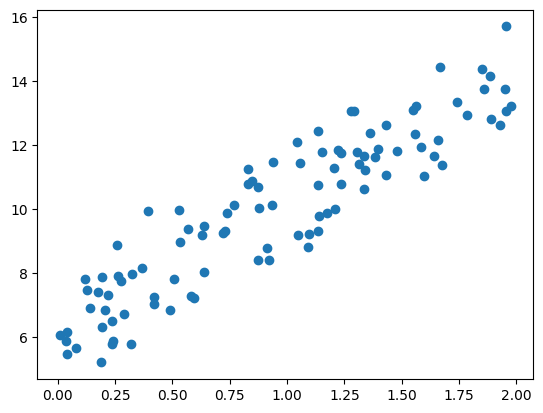

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

y = 4X + 6을 중심으로 무작위로 퍼져 있음

In [3]:
# 비용함수 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

- `gradient_descent()`: 경사 하강법 구현
  - $w_1, w_0$를 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $w_1, w_0$ 업데이트
- `get_weight_update()`: W 업데이트
  - 입력 배열 X값에 대한 예측 배열 y_pred는 X와 w1의 내적으로 계산

In [4]:
# w1과 w0 업데이트 할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update, w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1, w0 업데이트 적용
def gradient_descent_steps(X, y, iters=1000):
  # w0, w1 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [6]:
# RSS 계산 함수
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식과 유사하게 w1, w0 도출됨

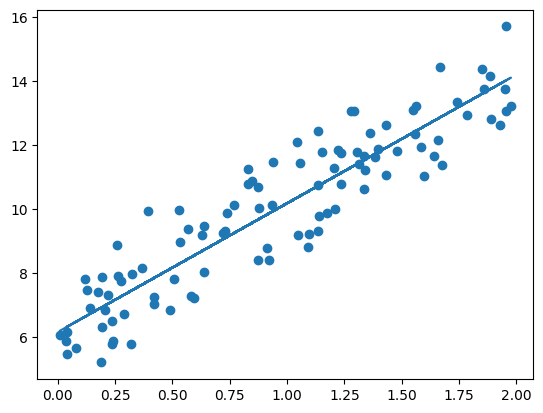

In [7]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 => 수행 시간 매우 오래 걸림
- 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent) 이용
  - w가 업데이트되는 값을 계산할 때 일부 데이터만 이용
- `stochastic_gradient_descent_steps()`: (미니 배치) 확률적 경사 하강법 구현
  - X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 10000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- w1, w0과 예측 오류 비용 모두 경사 하강법으로 구한 값과 거의 차이 없음

**여러 개의 피처**

$\hat{Y}=w_0+w1*X_1+w2*X_2+...$
- $\hat{Y}=np.dot(X_{mat}, W^T)+w_0$로 계산
- w0도 Weight 배열(W) 안에 포함시키기 위해 $X_{mat}$의 맨 처음 열에 모든 데이터가 1인 피처 Feat0 추가

  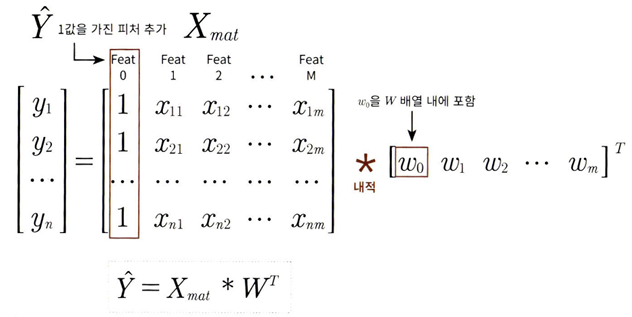

## **04 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측**

### **LinearRegression 클래스 - Ordinary Least Squares**

`LinearRegression` 클래스: 예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- `fit()` 메서드로 X, y 배열 입력받으면 회귀 계수인 W를 `coef_` 속성에 저장

  ```
  class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
  ```
- 입력 파라미터
  - `fit_intercept` (boolean, default=True): intercept 값을 계산할지 말지 => 0인 경우 intercept=0

    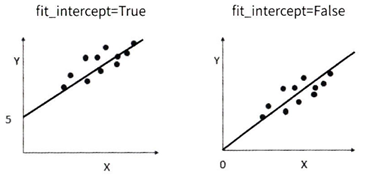
  - `normalize` (boolean, default=False): 회귀 수행하기 전 입력 데이터 세트 정규화하기. `fit_intercept=False`인 경우 파라미터 무시됨.
- 속성
  - `coef_`: fit() 메서드 수행 시 회귀 계수가 배열 형태로 저장하는 속성
  - `intercept_`: intercept 값

- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향 받음
  - 피처 간 상관관계가 매우 높은 경우 분산이 커져서 오류에 민감해짐 = **다중공선성(multi-collinearity)** 문제
  - 상관관계 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
  - 매우 많은 피처가 다중 공선성 문제 가지고 있는 경우 PCA를 통한 차원 축소도 고려

### **회귀 평가 지표**
- MAE, MSE, RMSE, R2, MSE, MSLE, RMSLE 등

  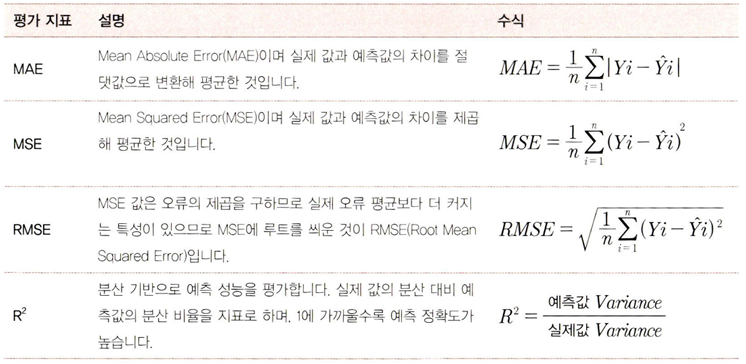

*사이킷런은 RMSE를 제공하지 않기 때문에 MSE에 제곱근을 씌워서 계산하는 함수 만들어야 함
- **MAE**
  - 사이킷런 평가 지표 API: `metrics.mean_absolute_error`
  - Scoring 함수 적용 값: `neg_mean_absolute_error`
- **MSE**
  - 사이킷런 평가 지표 API: `metrics.mean_squared_error`
  - Scoring 함수 적용 값: `neg_mean_squared_error`
- **R2**
  - 사이킷런 평가 지표 API: `metrics.r2_score`
  - Scoring 함수 적용 값: `r2`

Scoring 함수는 score 값이 클수록 좋은 평가 결과로 평가
  
  => MAE, MSE에는 Negative(음수)를 취함

### **LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

- 피처 설명

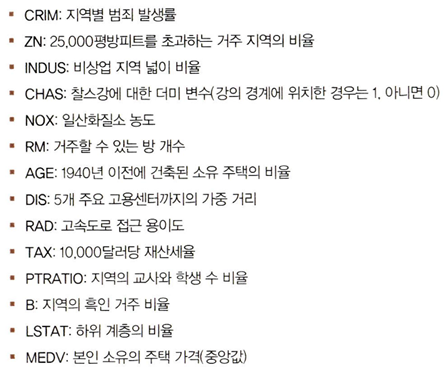

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns=feature_names)

print('Boston 데이터 세트 크기:', bostonDF.shape)

bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


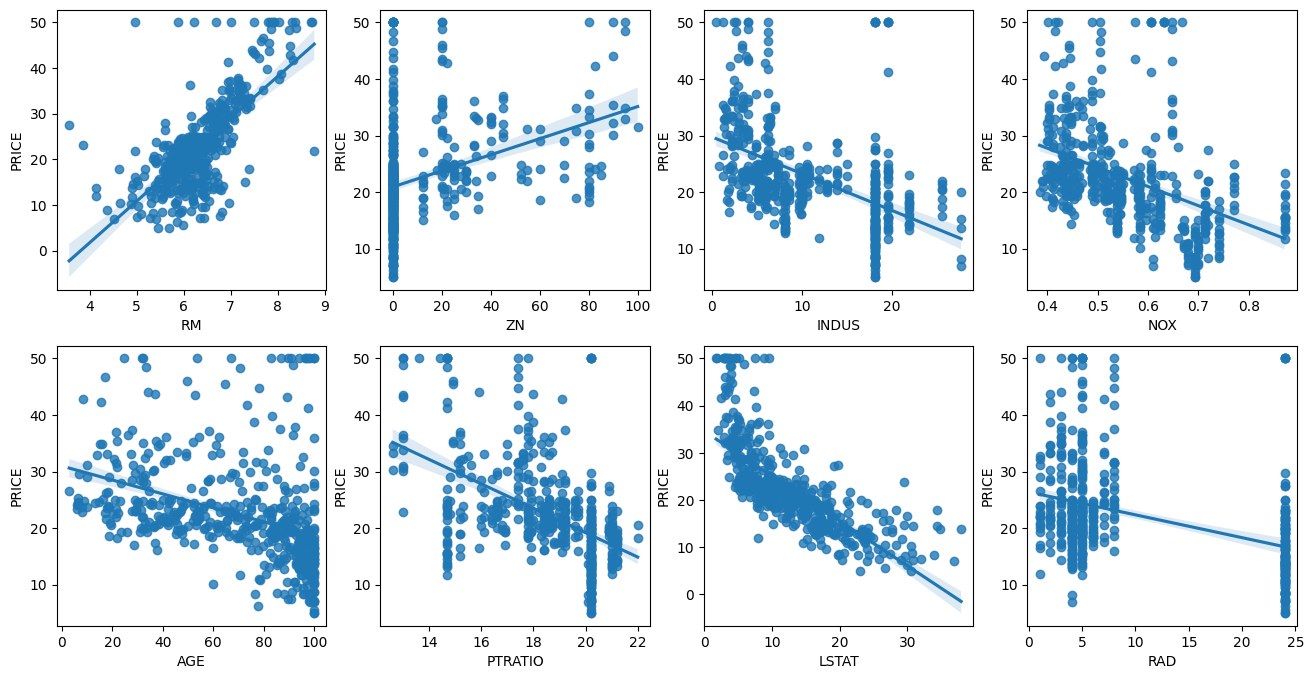

In [13]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [15]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## **05 다항 회귀와 과(대)적합/과소적합 이해**

### **다항 회귀 이해**

다음 데이터 세트의 경우 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 높은 예측 성능을 가짐

  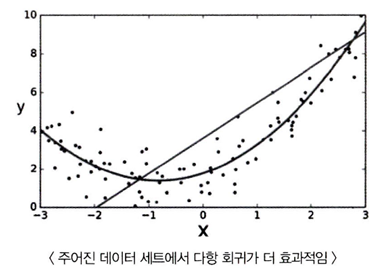

- 사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지는 않음
- `PolynomialFeatures` 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [19]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [20]:
# 3 차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


Pipeline 객체를 이용해 한 번에 다항회귀 구현

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### **다항 회귀를 이용한 과소적합 및 과적합 이해**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X: 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y: 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


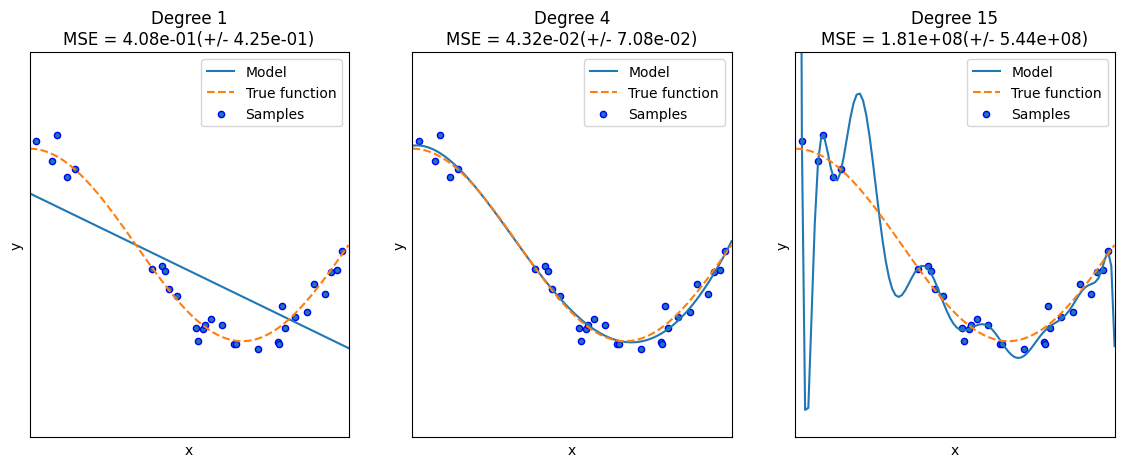

In [24]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### **편향-분산 트레이드오프(Bias-Variance Trade off)**

- Degree 1 모델: 매우 단순화된 모델. 지나치게 한 방향성으로 치우친 경향 => **고편향(High Bias)**
- Degree 15 모델: 학습 데이터 하나하나의 특성을 반영하며 매우 복잡한 모델이 되어 지나치게 높은 변동성을 가짐 => **고분산(High Variance)**

  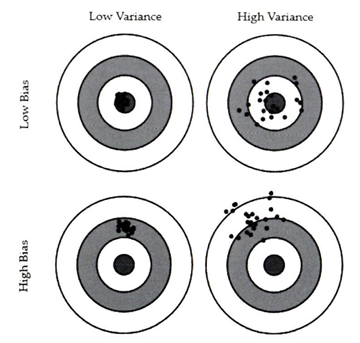

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음
  - 편향이 높으면 분산이 낮아짐(과소적합), 분산이 높으면 편향이 낮아짐(과적합)

  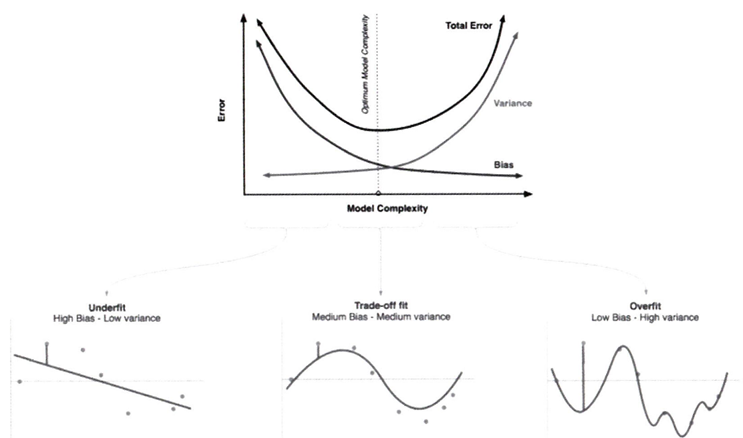